In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'data\5_homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


# Categorical variables

Categorical variables such as `town` in our DataFrame can be confusing to various models. So we need to represent them in some other way.

We can create ___dummy variables___ for each for the unique values for our categorial variable. In this case, we will create a column for each of the towns, with 1 in rows that are from that town.

In [3]:
t_df = pd.concat([df, pd.get_dummies(df['town'])], axis='columns')
t_df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


Since we have our dummy variables we can drop the original column

In [4]:
t_df.drop('town', axis=1, inplace=True)

### Dummy variable trap!
Whenever the information in one variable can be derived from information in other variables, they are siad to be ***"multi-colinear"***. All the dummy variables in our data represent complementary information and hence display co-linearity. 

- If we use all of the dummy variables we our model will fall into the "[Dummy variable trap](https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/)", leading to inaccurate predictions and classifications.

- Therefore, as a rule of thumb we must drop one of the dummy variables.

In [5]:
t_df.drop('west windsor', axis=1, inplace=True)

In [6]:
t_df

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


### Modeling

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

In [9]:
X = t_df.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [10]:
y = t_df['price']
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [11]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.predict([[2800, 0, 1]])

array([590775.63964739])

In [13]:
model.predict([[34, 0, 0]])

array([254104.88067088])

In [14]:
model.score(X, y)

0.9573929037221873

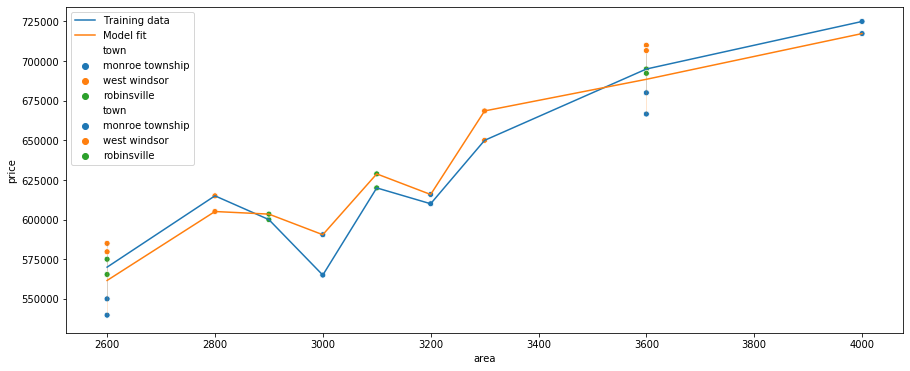

In [15]:
plt.figure(figsize=(15, 6))
sns.scatterplot(X['area'], y, hue=df['town'])
sns.lineplot(X['area'], y, label='Training data')
sns.scatterplot(X['area'], model.predict(X), hue=df['town'])
sns.lineplot(X['area'], model.predict(X), label='Model fit')

# One hot encoder

In [16]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
dfle = df
dfle['town'] = le.fit_transform(dfle['town'])

In [20]:
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [21]:
X = dfle[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [22]:
y = dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
ohe = OneHotEncoder(categorical_features=[0])

In [25]:
X = ohe.fit_transform(X).toarray()
X

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:450: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[   1.,    0.,    0., 2600.],
       [   1.,    0.,    0., 3000.],
       [   1.,    0.,    0., 3200.],
       [   1.,    0.,    0., 3600.],
       [   1.,    0.,    0., 4000.],
       [   0.,    0.,    1., 2600.],
       [   0.,    0.,    1., 2800.],
       [   0.,    0.,    1., 3300.],
       [   0.,    0.,    1., 3600.],
       [   0.,    1.,    0., 2600.],
       [   0.,    1.,    0., 2900.],
       [   0.,    1.,    0., 3100.],
       [   0.,    1.,    0., 3600.]])

In [26]:
X = X[:, 1:]
X

array([[   0.,    0., 2600.],
       [   0.,    0., 3000.],
       [   0.,    0., 3200.],
       [   0.,    0., 3600.],
       [   0.,    0., 4000.],
       [   0.,    1., 2600.],
       [   0.,    1., 2800.],
       [   0.,    1., 3300.],
       [   0.,    1., 3600.],
       [   1.,    0., 2600.],
       [   1.,    0., 2900.],
       [   1.,    0., 3100.],
       [   1.,    0., 3600.]])

In [27]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
model.predict([[1, 0, 2800]])

array([590775.63964739])

In [29]:
model.predict([[0, 1, 3400]])

array([681241.6684584])

In [30]:
X[:, -1]

array([2600., 3000., 3200., 3600., 4000., 2600., 2800., 3300., 3600.,
       2600., 2900., 3100., 3600.])

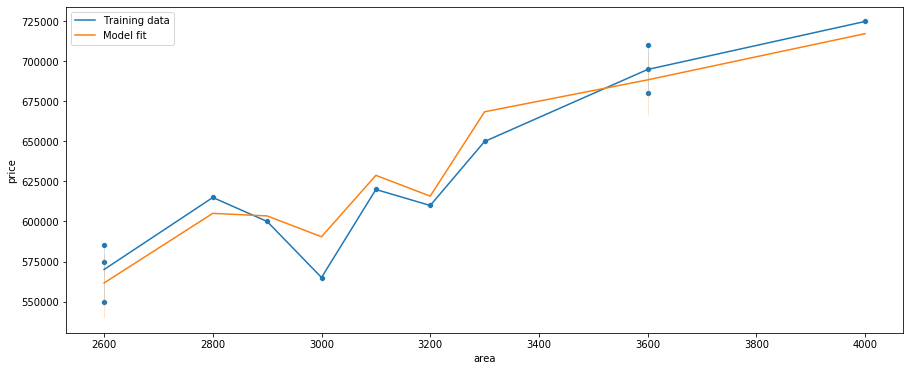

In [31]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='area', y='price')
sns.lineplot(data=df, x='area', y='price', label='Training data')
sns.lineplot(df['area'], y=model.predict(X), label='Model fit')